***Data Analytics by Peter***

Here is an excerpt of some data visualisations I have conducted during my school studies. The visualisations hope to provide insight into my capabilities in visualizing and analyzing data. To avoid publishing sensitive data, I have hand-picked visualisations that either use random-generated or open source data. 


***Percentual GDP Growth of 20 Most Fluctuating European Countries***

Analyzing percentual GDP growth among European countries between 2019-2023. Plotting the data for the 20 most fluctuating countries.

Data source https://ec.europa.eu/eurostat/databrowser/view/NAMQ_10_GDP__custom_3761889/bookmark/table?lang=en&bookmarkId=4eef75c1-4ab8-4e39-865e-6301e3390d28

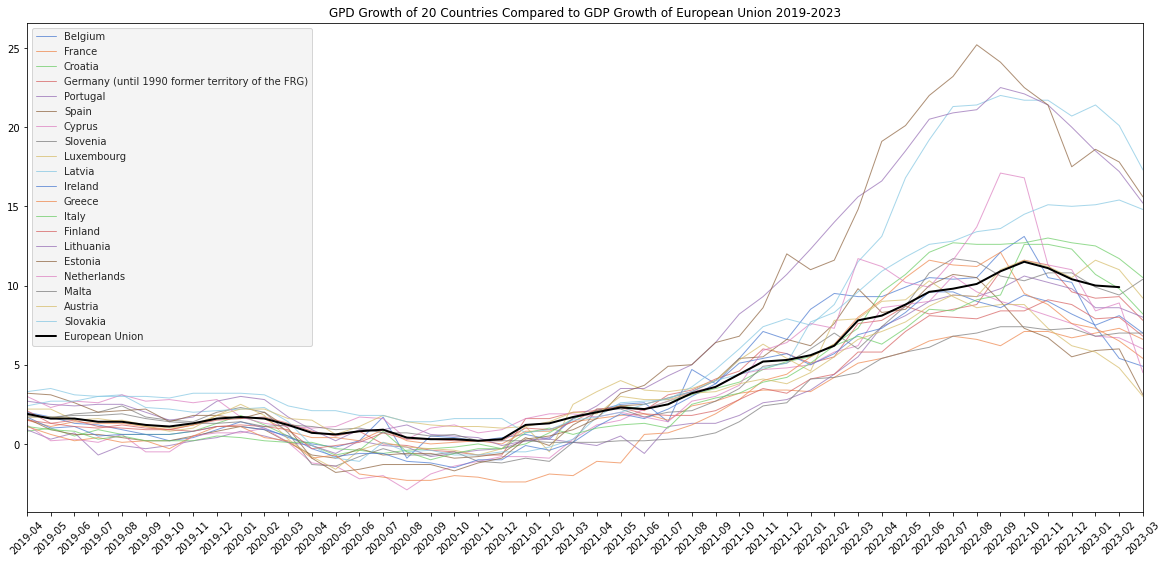

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# read ";" separated data
df1 = pd.read_csv('gdpe.csv')
df1 = df1.dropna()
df1.drop(df1.index[-1], inplace=True)
df1['European Union'] = df1['European Union'].str.replace(',', '.').astype(float)
#print(df1)

# Load GBD data into a pandas dataframe
df = pd.read_csv('output_file.csv')

# drop columns starting with 'Unnamed'
df = df.filter(regex='^(?!Unnamed)')

# Replace ':' with NaN values and drop rows with missing values
df = df.replace(':', np.nan)
df.dropna(inplace=True)

# Transpose the data and reset column names
df = df.transpose()
df.columns = df.iloc[0]
df = df[1:]

# Convert the DataFrame to a numeric type
df = df.apply(lambda x: x.str.replace(',', '.')).astype(float)

# Calculate percent change for each country's GDP growth rate over time
pct_change = df.pct_change()

# Get the top x most radical movements
top_5 = pct_change.abs().mean().nlargest(100).index

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(20, 10))

# Define a list of colors for each country
colors = sns.color_palette("muted", n_colors=len(top_5))

# Set the background color to a light gray
sns.set_style("whitegrid", {'axes.facecolor': '#f2f2f2'})

# Plot the data for each country with a different color
for i, col in enumerate(top_5):
    alpha = 0.7 if col != 'European Union' else 3.0
    linewidth = 0.5 if col == 'European Union' else 1.0
    ax.plot(df.index, df[col], color=colors[i], alpha=alpha, linewidth=linewidth, label=col)

# Add the data for the European Union to the plot
ax.plot(df1['TIME'], df1['European Union'], color='black', alpha=1.0, linewidth=2.0, label='European Union')

# Add title and legend
ax.set_title('GPD Growth of 20 Countries Compared to GDP Growth of European Union 2019-2023')
ax.legend(loc='upper left')

# Set the x-axis limits
ax.set_xlim(df.index[0], df.index[-1])

# Rotate the x-axis tick labels
plt.xticks(rotation=45)

# Adjust the subplot spacing to make more room for the x-axis
fig.subplots_adjust(bottom=0.2)

# Show the plot
#plt.savefig('plot1.png')
plt.show()

***Trellis visualisation of olive oil types from different Italian regions. Data source Olive.csv***

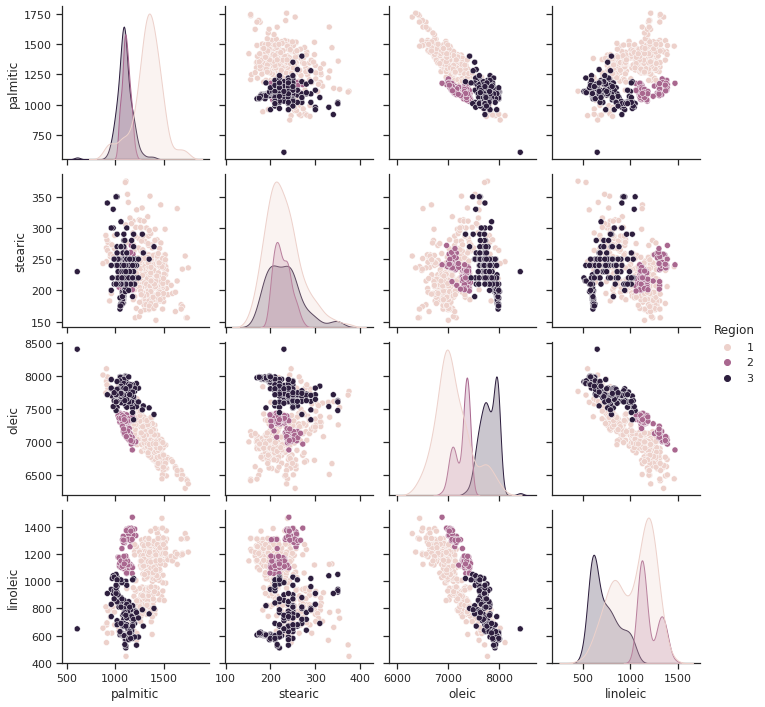

In [5]:
import pandas as pd
import seaborn as sns

# Load the olive oil dataset into a Pandas dataframe
df = pd.read_csv('olive.csv')

# Select the features to be plotted
features = ['palmitic', 'stearic', 'oleic', 'linoleic']

# Set the style of the plots
sns.set(style="ticks")

# Create the trellis of scatterplots with different colors for each region
sns.pairplot(df, vars=features, hue="Region", diag_kind="kde")

***Comparing Bitcoin vs. SP500 index*** Source BTCvsSP500.csv example file

Bitcoin lowest price: 29.65 on 2013-02-20 00:00:00
Bitcoin highest price: 18972.320313 on 2017-12-18 00:00:00
S&P 500 lowest price: 1487.849976 on 2013-02-25 00:00:00
S&P 500 highest price: 2872.870117 on 2018-01-26 00:00:00


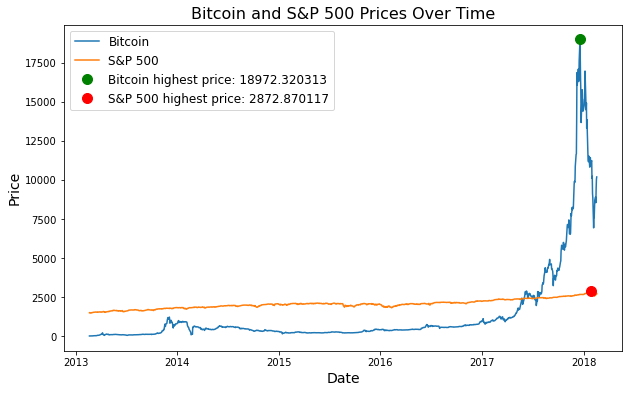

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data
df = pd.read_csv("BTCvsSP500.csv")
df["date"] = pd.to_datetime(df["date"])

# Create a figure and axis object with custom size
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Bitcoin prices over time
ax.plot(df["date"], df["BTC"], label="Bitcoin")

# Plot S&P 500 prices over time
ax.plot(df["date"], df["SP500"], label="S&P 500")

# Find the highest Bitcoin and S&P 500 prices and their corresponding dates
btc_highest_price = df["BTC"].max()
btc_highest_date = df.loc[df["BTC"].idxmax()]["date"]
sp500_highest_price = df["SP500"].max()
sp500_highest_date = df.loc[df["SP500"].idxmax()]["date"]

# Adding max value points to graph
ax.plot(btc_highest_date, btc_highest_price, 'go', markersize=10, label=f"Bitcoin highest price: {btc_highest_price}")
ax.plot(sp500_highest_date, sp500_highest_price, 'ro', markersize=10, label=f"S&P 500 highest price: {sp500_highest_price}")

# Adding legend
ax.legend(fontsize=12)

# Setting axis labels and title with custom font size
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Price", fontsize=14)
ax.set_title("Bitcoin and S&P 500 Prices Over Time", fontsize=16)

# Find lowest and highest prices and their corresponding dates
btc_lowest_price = df["BTC"].min()
btc_lowest_date = df.loc[df["BTC"].idxmin()]["date"]
btc_highest_price = df["BTC"].max()
btc_highest_date = df.loc[df["BTC"].idxmax()]["date"]
sp500_lowest_price = df["SP500"].min()
sp500_lowest_date = df.loc[df["SP500"].idxmin()]["date"]
sp500_highest_price = df["SP500"].max()
sp500_highest_date = df.loc[df["SP500"].idxmax()]["date"]

# Printing
print(f"Bitcoin lowest price: {btc_lowest_price} on {btc_lowest_date}")
print(f"Bitcoin highest price: {btc_highest_price} on {btc_highest_date}")
print(f"S&P 500 lowest price: {sp500_lowest_price} on {sp500_lowest_date}")
print(f"S&P 500 highest price: {sp500_highest_price} on {sp500_highest_date}")

# Show plot
plt.show()


**A visualisation of a simple network structure.**

Source random generated tgf file

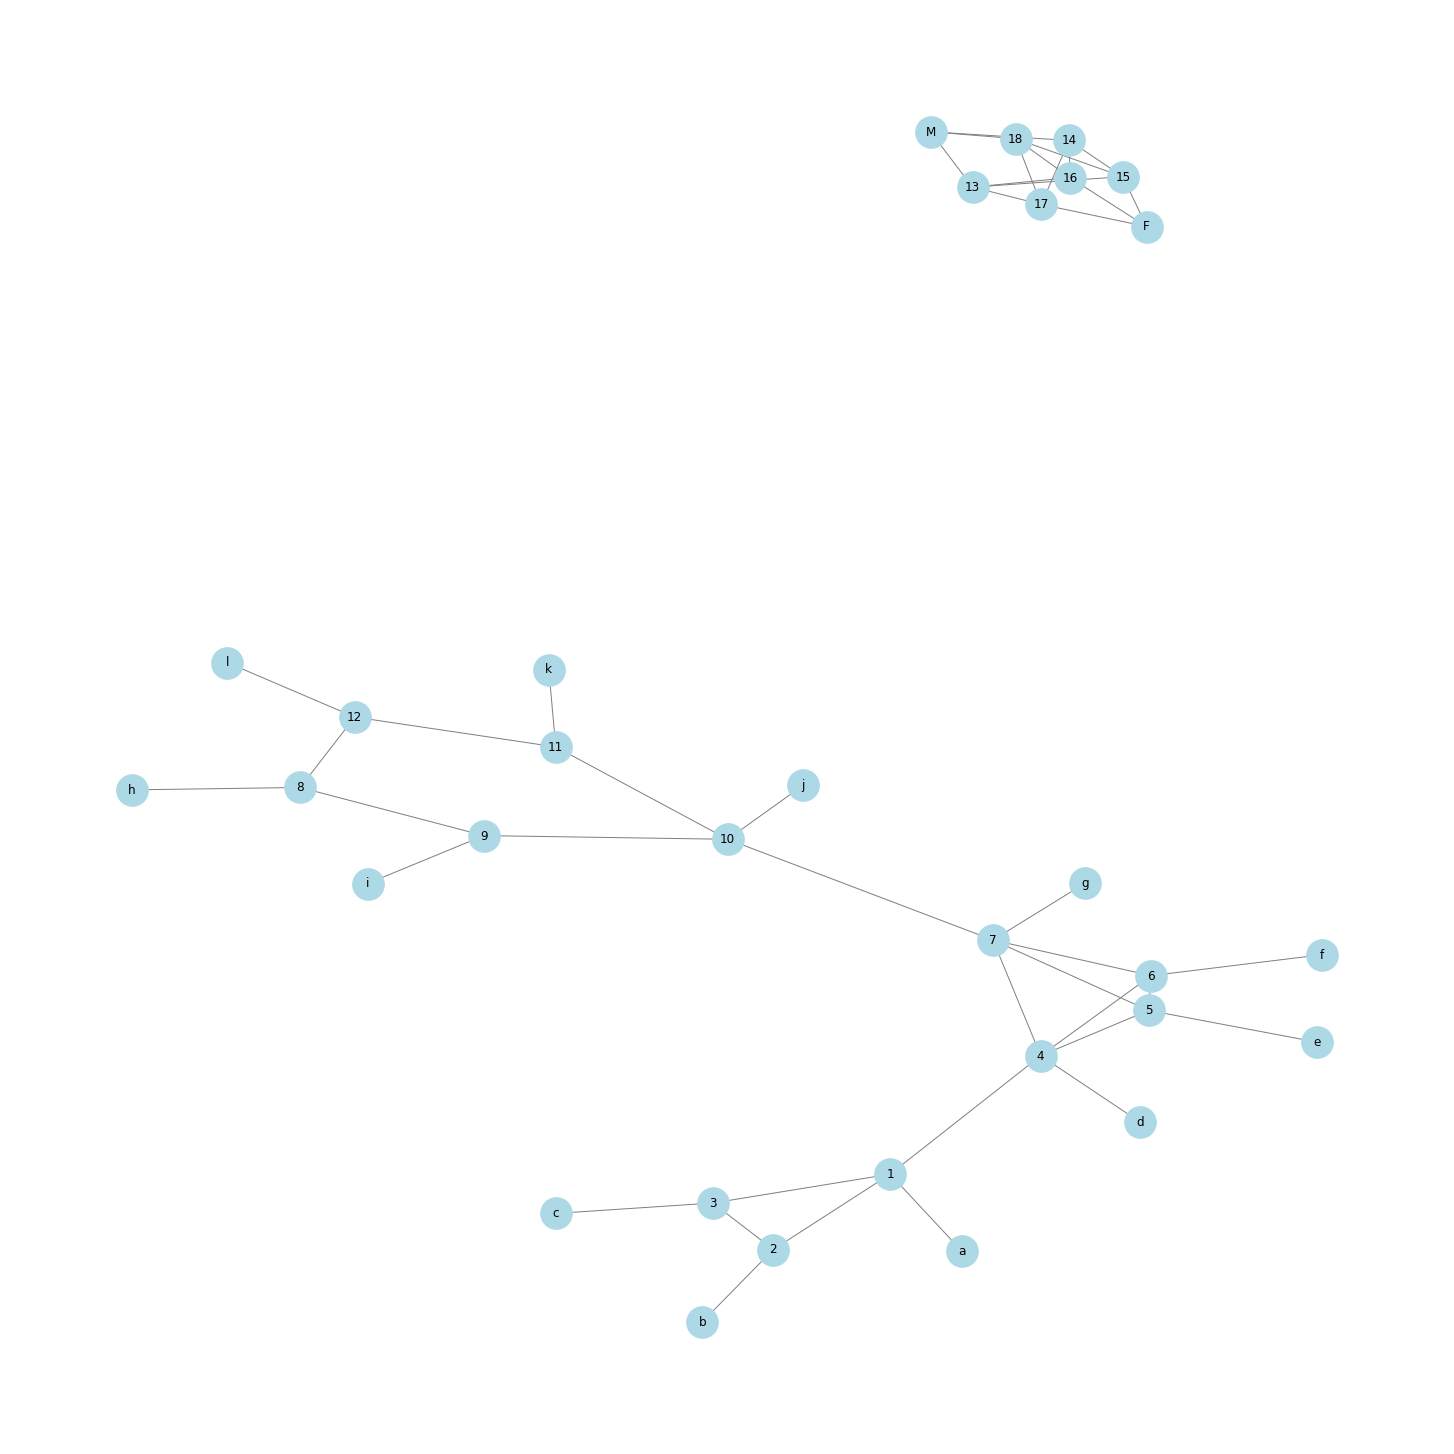

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.Graph()

# Open the file and read each line
with open('network_data.tgf', 'r') as f:
    for line in f:
        line = line.strip()
        if not line:
            continue
        # If the line starts with '#' it is a comment, skip it
        if line.startswith('#'):
            continue
        node1, node2 = line.split()
        G.add_edge(node1, node2)

# Draw the graph
pos = nx.spring_layout(G)
plt.figure(figsize=(20,20))
nx.draw(G, pos=pos, with_labels=True, node_color='lightblue', node_size=1000, edge_color='gray', width=1)


**Exploring dimensionalities from random data**

In [5]:
import csv
import pandas as pd
df = pd.read_csv('output-Copy1.csv')
print(df.head())

          t          x          y          z
0  0.000000  152.79004  146.01233  184.04712
1  0.005712  140.93199  141.54543  190.74310
2  0.011424  166.84079  157.80817  158.01982
3  0.017136  169.43263  171.46033  142.72464
4  0.022848  145.67673  138.08115  192.44513


**(a)** Make a trellis of 2-dimensional scatterplots of the point set in X such that you map the value of vector t to a suitable continuous colour scale (e.g., spectral scale).

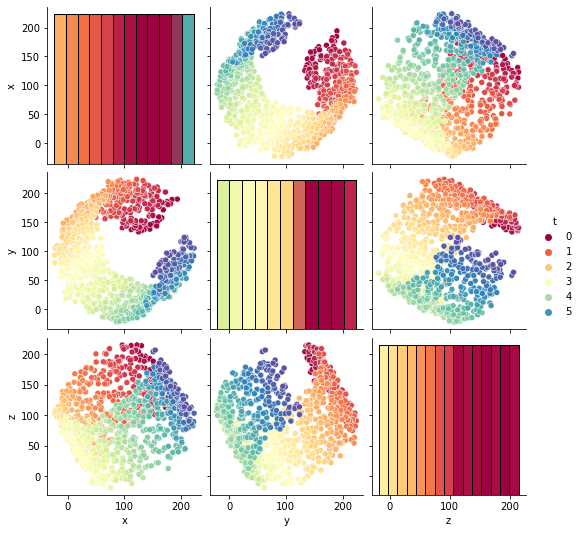

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, Isomap

df = pd.read_csv('output-Copy1.csv')
#print(df.head())
# Load the data
#df = pd.read_csv("output.csv", header=None)

# Rename columns
df.columns = ["t", "x", "y", "z"]

# (a) Trellis of 2D scatterplots with t as color
sns.pairplot(df, vars=["x", "y", "z"], diag_kind='hist', hue='t', palette='Spectral')
plt.show()

(b) Use pca, project the data to the first principal component, and make a plot of the data into one dimension using the same colour scale as in item (a) above. Also, make a histogram of the one-dimensional embedding.

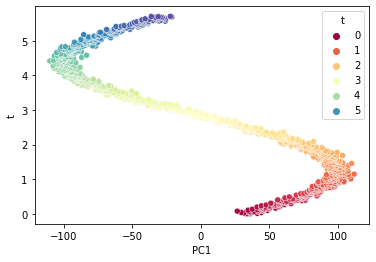

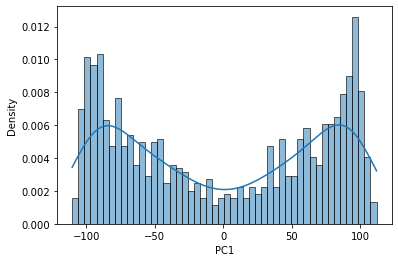

In [9]:
df = pd.read_csv('output-Copy1.csv') #read CSV, in this case I have preprosessed mysticdata resulting in output.csv

# (b) PCA to 1 dimension  
X = df.iloc[:, 1:].values
X_centered = X - np.mean(X, axis=0)
pca = PCA(n_components=1)
X_1d = pca.fit_transform(X_centered)
df_1d = pd.DataFrame(np.hstack((X_1d, df["t"].values.reshape(-1, 1))), columns=["PC1", "t"])
# Plotting
sns.scatterplot(x="PC1", y="t", hue="t", data=df_1d, palette='Spectral')
plt.show()
sns.histplot(x="PC1", data=df_1d, bins=50, kde=True, stat='density')
plt.show()


(c) Then make two-dimensional plots of the data projected to the rst and second pca components, and to the second and third components.

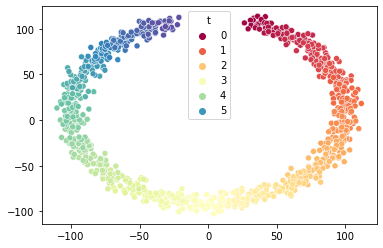

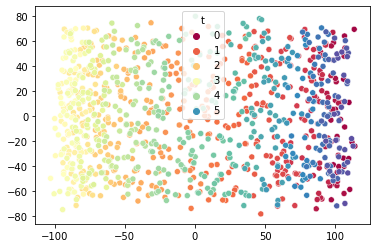

In [10]:
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_centered)
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=df["t"], palette='Spectral')
plt.show()

pca_3d = PCA(n_components=3)
X_3d = pca_3d.fit_transform(X_centered)
sns.scatterplot(x=X_3d[:, 1], y=X_3d[:, 2], hue=df["t"], palette='Spectral')
plt.show()

(d) Use nonmetric mds or Sammon mapping to embed the data into one or two dimensions and plot the data the same way you did in item (b) above.

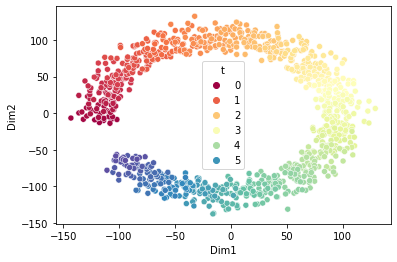

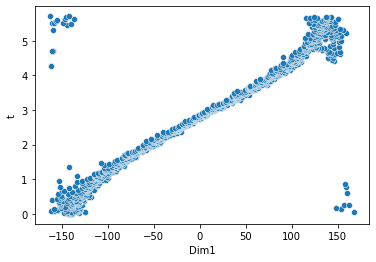

In [11]:
# (d) MDS to 1 and 2 dimensions
mds = MDS(n_components=2)
X_mds = mds.fit_transform(X_centered)
df_mds = pd.DataFrame(np.hstack((X_mds, df["t"].values.reshape(-1, 1))), columns=["Dim1", "Dim2", "t"])
sns.scatterplot(x="Dim1", y="Dim2", data=df_mds, hue="t", palette='Spectral')
plt.show()
mds = MDS(n_components=1)
X_mds_1d = mds.fit_transform(X_centered)
df_mds_1d = pd.DataFrame(np.hstack((X_mds_1d, df["t"].values.reshape(-1, 1))), columns=["Dim1", "t"])
sns.scatterplot(x="Dim1", y="t", data=df_mds_1d, palette='Spectral')
plt.show()

(e) Use Isomap, embed the data into one or two dimensions and plot the data the same way you did in item (b) above.

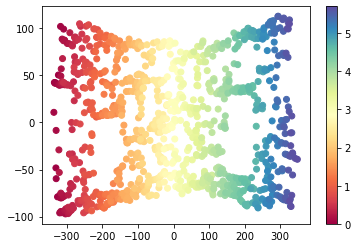

In [13]:
!pip install scikit-learn plotly
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('output-Copy1.csv')
df.columns = ["t", "x", "y", "z"]

# Perform Isomap embedding
iso = Isomap(n_components=2)
X_iso = iso.fit_transform(df.iloc[:, 1:])

# Plot data with t as color
plt.scatter(X_iso[:, 0], X_iso[:, 1], c=df['t'], cmap='Spectral')
plt.colorbar()
plt.show()